## 택스트 기반의 다중 분류

환경 로드

In [1]:
from sklearn.datasets import fetch_20newsgroups#data로드
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer#토큰
from tensorflow.keras.utils import to_categorical#원핫인코딩 (정수형 범주)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

data로드

In [2]:
data=fetch_20newsgroups()
X_data=data.data
Y_data=data.target

data 전처리

In [3]:
tk=Tokenizer(num_words=10000)
tk.fit_on_texts(X_data)
X=tk.texts_to_matrix(X_data,mode='tfidf')#mode=[binary,count,tfidf]
Y= to_categorical(Y_data)
t_x,tt_x,t_y,tt_y=train_test_split(X,Y)
type(X)

numpy.ndarray

모델 생성 학습

In [4]:
m=Sequential()
m.add(Dense(256,input_shape=(10000,),activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(128,activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(20,activation='softmax'))
m.compile(optimizer='adam',loss='categorical_crossentropy',
          metrics=['accuracy'])
hy=m.fit(t_x,t_y,epochs=10,validation_data=(tt_x,tt_y))

Epoch 1/10
266/266 [==============================] - 4s 14ms/step - loss: 1.9661 - accuracy: 0.4543 - val_loss: 0.6321 - val_accuracy: 0.8537
Epoch 2/10
266/266 [==============================] - 3s 13ms/step - loss: 0.7033 - accuracy: 0.8166 - val_loss: 0.4880 - val_accuracy: 0.8834
Epoch 3/10
266/266 [==============================] - 3s 13ms/step - loss: 0.4602 - accuracy: 0.8925 - val_loss: 0.4659 - val_accuracy: 0.8809
Epoch 4/10
266/266 [==============================] - 4s 13ms/step - loss: 0.3720 - accuracy: 0.9233 - val_loss: 0.4515 - val_accuracy: 0.8947
Epoch 5/10
266/266 [==============================] - 3s 13ms/step - loss: 0.2680 - accuracy: 0.9459 - val_loss: 0.4410 - val_accuracy: 0.8904
Epoch 6/10
266/266 [==============================] - 3s 12ms/step - loss: 0.2288 - accuracy: 0.9551 - val_loss: 0.4628 - val_accuracy: 0.8961
Epoch 7/10
266/266 [==============================] - 3s 11ms/step - loss: 0.1977 - accuracy: 0.9697 - val_loss: 0.4960 - val_accuracy: 0.8957

결과 확인

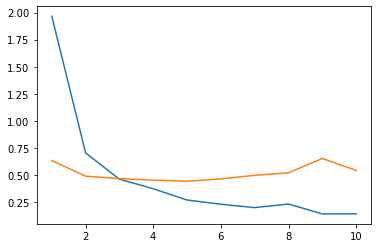

In [5]:
ec=range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])